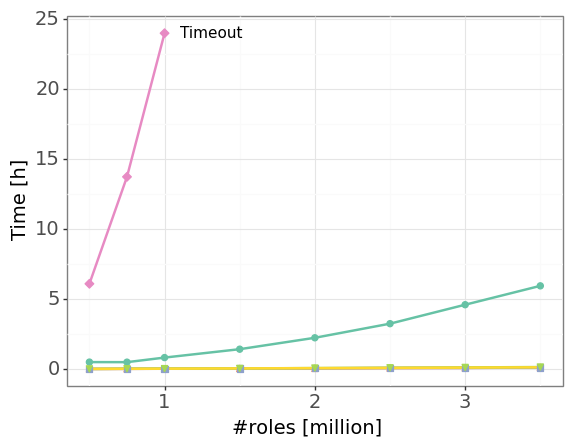

/Users/tobias/Documents/scripts/RoleMatchingEvaluation/env/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 3 x 2 in image.
/Users/tobias/Documents/scripts/RoleMatchingEvaluation/env/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: exported_plots_new/nRolesScalability.pdf


In [19]:
import pandas as pd
from plotnine import *
from plotnine.data import *

df = pd.read_csv("localData/scalability/numRoles.csv")
dfTimestamps = pd.read_csv("localData/scalability/nTimestamps.csv")
plotHeight = 2
plotWidth = 3

def getNRolesFromFileName(param):
    return int(param.split(".")[0]) / 1000000


df["nRoles"] = df.apply(lambda x: getNRolesFromFileName(x["file"]),axis=1)
df["timeInHours"] = df["timeInSeconds"] / 3600

plot = ggplot(df, aes(x ='nRoles', y='timeInHours', color="method", shape = "method")) + \
    geom_line(size=1) + geom_point(size=2) + theme_bw() + theme(text=element_text(size=14)) + \
    ylab("Time [h]") + xlab("#roles [million]") + ylim(0,24) + \
    scale_color_brewer(type="qual",palette="Set2", name = "Method") + scale_shape(name = "Method") +\
    theme(legend_position = "none") + guides(colour = guide_legend(nrow = 1)) + \
    annotate("text", x = 1.1, y = 24, label = "Timeout",  ha="left")
print(plot)
plot.save("exported_plots_new/nRolesScalability.pdf",height=plotHeight,width=plotWidth)

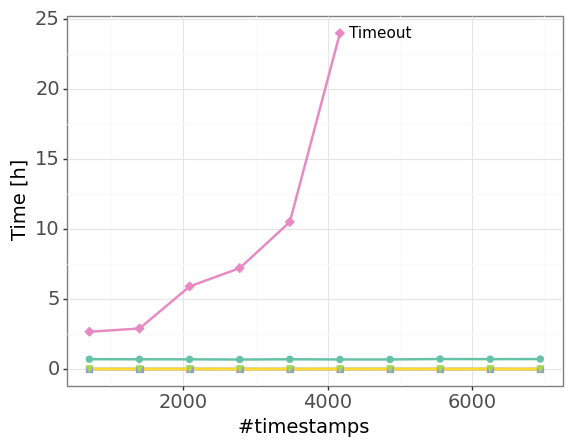

/Users/tobias/Documents/scripts/RoleMatchingEvaluation/env/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 3 x 2 in image.
/Users/tobias/Documents/scripts/RoleMatchingEvaluation/env/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: exported_plots_new/timestampScalability.pdf


In [23]:
dfTimestamps = pd.read_csv("localData/scalability/nTimestamps.csv")

dfTimestamps["timeInHours"] = dfTimestamps["timeInSeconds"] / 3600


def getNTimestampsFromFileName(param):
    return int(param.split("_")[1])*695


dfTimestamps["nTimestamps"] = dfTimestamps.apply(lambda x: getNTimestampsFromFileName(x["file"]),axis=1)
plot = ggplot(dfTimestamps, aes(x ='nTimestamps', y='timeInHours', color="method", shape = "method")) + geom_line(size=1) + geom_point(size=2) + theme_bw() + theme(text=element_text(size=14)) + ylab("Time [h]") + xlab("#timestamps ") + ylim(0,24) + scale_color_brewer(type="qual",palette="Set2") + theme(legend_position = "none") + \
    annotate("text", x = 4300, y = 24, label = "Timeout",  ha="left")
print(plot)
plot.save("exported_plots_new/timestampScalability.pdf",height=2,width=3)